<a href="https://colab.research.google.com/github/rajaganaa/Rajaganaa_ML_Project2/blob/main/ML_5_Industrial_Human_Resource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Function to merge CSV files in a folder
def merge_csv_files(folder_path):
    try:
        # List all CSV files in the folder
        csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

        # Initialize an empty list to store DataFrame objects
        dfs = []

        # Read each CSV file and append its DataFrame to the list
        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            try:
                # Try reading the CSV file with different encodings
                df = pd.read_csv(file_path, encoding='utf-8')
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='latin-1')
                except UnicodeDecodeError:
                    df = pd.read_csv(file_path, encoding='ISO-8859-1')
            dfs.append(df)

        # Concatenate all DataFrames into a single DataFrame
        merged_df = pd.concat(dfs, ignore_index=True)

        return merged_df
    except Exception as e:
        print("An error occurred:", e)

# Specify the folder path containing CSV files
folder_path = r"/content/drive/Othercomputers/My Laptop (1)/Desktop/raj007_projects/ML_PROJECT_NLP/drive-download-20240913T081543Z-001"
# Merge CSV files in the folder
merged_df = merge_csv_files(folder_path)

# Now you have the merged DataFrame containing data from all CSV files in the folder


In [86]:
merged_df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`30,`000,STATE - GOA,`00,`000,`0000,Total,7573,5536,2037,...,1459,1784,1025,759,820,456,364,964,569,395
1,`30,`000,STATE - GOA,`01,`000,`0000,"Crop and animal production, hunting and relate...",12,8,4,...,0,9,9,0,6,6,0,3,3,0
2,`30,`000,STATE - GOA,`01,`014,`0000,Animal production,4,0,4,...,0,0,0,0,0,0,0,0,0,0
3,`30,`000,STATE - GOA,`01,`014,`0141,Raising of cattle and buffaloes,4,0,4,...,0,0,0,0,0,0,0,0,0,0
4,`30,`000,STATE - GOA,`01,`016,`0000,Support activities to agriculture and post-har...,8,8,0,...,0,9,9,0,6,6,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`21,`399,District - Malkangiri,`99,`000,`0000,Activities of extraterritorial organizations a...,574,315,259,...,38,1222,294,928,1176,286,890,46,8,38
195141,`21,`399,District - Malkangiri,`99,`991,`0000,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
195142,`21,`399,District - Malkangiri,`99,`991,`9910,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
195143,`21,`399,District - Malkangiri,`99,`992,`0000,Incomplete description/ Wrongly Classifed,139,49,90,...,16,636,92,544,618,88,530,18,4,14


In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [88]:
# Separate state and district names
merged_df[['STATE', 'District']] = merged_df['India/States'].str.split(' - ', expand=True)

# Function to separate state and district names
def separate_state_district(row):
    # Split the string based on the separator '-'
    parts = row.split(' - ')

    # If the first part is in uppercase (assumed to be state name), return it
    if parts[0].isupper():
        return parts[0]
    else:
        return None

# Apply the function to create a new column for state names
merged_df['State Name'] = merged_df['District'].apply(separate_state_district)

# Filter out None values and then print unique state names with commas
state_names = merged_df['State Name'].dropna().unique()
print(", ".join(state_names))


GOA, MIZORAM, KERALA, SIKKIM, PUDUCHERRY, UTTAR PRADESH, HIMACHAL PRADESH, TRIPURA, KARNATAKA, RAJASTHAN, ARUNACHAL PRADESH, BIHAR, NCT OF DELHI, MANIPUR, NAGALAND, UTTARAKHAND, TAMIL NADU, JHARKHAND, WEST BENGAL, ASSAM, GUJARAT, MAHARASHTRA, ODISHA


In [89]:
# Save DataFrame to CSV
merged_df.to_csv('human_resource2.csv', index=False)

In [90]:
##Perform Data Exploration (EDA):

In [91]:
merged_df["India/States"].unique()

array(['STATE - GOA', 'District - North Goa', 'District - South Goa',
       'STATE - MIZORAM', 'District - Mamit', 'District - Kolasib',
       'District - Aizawl', 'District - Champhai', 'District - Serchhip',
       'District - Lunglei', 'District - Lawngtlai', 'District - Saiha',
       'STATE - KERALA', 'District - Kasaragod', 'District - Kannur',
       'District - Wayanad', 'District - Kozhikode',
       'District - Malappuram', 'District - Palakkad',
       'District - Thrissur', 'District - Ernakulam', 'District - Idukki',
       'District - Kottayam', 'District - Alappuzha',
       'District - Pathanamthitta', 'District - Kollam',
       'District - Thiruvananthapuram', 'STATE - SIKKIM',
       'District - North  District', 'District - West District',
       'District - South District', 'District - East District',
       'STATE - PUDUCHERRY', 'District - Yanam', 'District - Puducherry',
       'District - Mahe', 'District - Karaikal', 'STATE - UTTAR PRADESH',
       'District

In [92]:
# Function to extract unique state names from the "India/States" column
def extract_states(data):
    # Split the entries by the string " - "
    split_data = data.str.split(" - ", expand=True)

    # The first part of the split will contain the state names
    states = split_data.iloc[:, 0].unique()

    return states

# Extract unique state names
unique_states = extract_states(merged_df["India/States"])
print(unique_states)


['STATE' 'District']


In [93]:
merged_df.shape

(195145, 28)

In [94]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District',
       'State Name'],
      dtype='object')

In [95]:
# Data Exploration
merged_df.iloc[10000:11000] # Display the first few rows of the merged DataFrame
#print(merged_df.info()) # Display information about the DataFrame (e.g., data types, missing values)


,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name
10000,`32,`596,District - Idukki,`16,`161,`0000,Sawmilling and planing of wood,38,38,0,...,6,6,0,6,0,0,0,District,Idukki,None
10001,`32,`596,District - Idukki,`16,`161,`1610,Saw milling and planing of wood,38,38,0,...,6,6,0,6,0,0,0,District,Idukki,None
10002,`32,`596,District - Idukki,`16,`162,`0000,"Manufacture of products of wood, cork, straw a...",286,220,66,...,36,94,58,36,0,0,0,District,Idukki,None
10003,`32,`596,District - Idukki,`16,`162,`1621,Manufacture of veneer sheets; manufacture of p...,12,12,0,...,0,0,0,0,0,0,0,District,Idukki,None
10004,`32,`596,District - Idukki,`16,`162,`1622,Manufacture of builders carpentry and joinery,122,116,6,...,0,24,24,0,0,0,0,District,Idukki,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,`32,`598,District - Alappuzha,`15,`151,`1512,"Manufacture of luggage, handbags and the like,...",12,6,6,...,9,6,0,6,3,0,3,District,Alappuzha,None
10996,`32,`598,District - Alappuzha,`15,`152,`0000,Manufacture of footwear,17,11,6,...,0,6,6,0,0,0,0,District,Alappuzha,None
10997,`32,`598,District - Alappuzha,`15,`152,`1520,Manufacture of footwear,17,11,6,...,0,6,6,0,0,0,0,District,Alappuzha,None
10998,`32,`598,District - Alappuzha,`16,`000,`0000,Manufacture of wood and products of wood and c...,574,496,78,...,48,76,54,22,117,91,26,District,Alappuzha,None


In [96]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [97]:
# Handling Missing Values
# Check for missing values in the DataFrame
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 State Code                                  0
District Code                               0
India/States                                0
Division                                    0
Group                                       0
Class                                       0
NIC Name                                    0
Main Workers - Total -  Persons             0
Main Workers - Total - Males                0
Main Workers - Total - Females              0
Main Workers - Rural -  Persons             0
Main Workers - Rural - Males                0
Main Workers - Rural - Females              0
Main Workers - Urban -  Persons             0
Main Workers - Urban - Males                0
Main Workers - Urban - Females              0
Marginal Workers - Total -  Persons         0
Marginal Workers - Total - Males            0
Marginal Workers - Total - Females          0
Marginal Workers - Rural -  Persons         0
Marginal Workers - Rural - Males            0
Marginal Workers 

In [98]:
# Removing Duplicates
# Check for duplicate rows in the DataFrame
duplicate_rows = merged_df.duplicated()
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool


In [99]:
# Summary statistics
summary_stats = merged_df.describe()
print(summary_stats)

       Main Workers - Total -  Persons  Main Workers - Total - Males  \
count                     1.951450e+05                  1.951450e+05   
mean                      1.492138e+03                  1.193171e+03   
std                       4.568169e+04                  3.773917e+04   
min                       0.000000e+00                  0.000000e+00   
25%                       6.000000e+00                  6.000000e+00   
50%                       2.800000e+01                  2.300000e+01   
75%                       1.880000e+02                  1.450000e+02   
max                       1.561976e+07                  1.280140e+07   

       Main Workers - Total - Females  Main Workers - Rural -  Persons  \
count                    1.951450e+05                     1.951450e+05   
mean                     2.989664e+02                     6.606187e+02   
std                      8.582019e+03                     2.044436e+04   
min                      0.000000e+00                  

In [100]:
merged_df.describe(include="all")

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name
count,195145,195145,195145,195145,195145,195145,195145,1.951450e+05,1.951450e+05,1.951450e+05,...,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,195145.000000,195145.000000,195145,195145,14715
unique,23,472,491,89,241,423,587,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,491,23
top,`08,`000,STATE - WEST BENGAL,`47,`000,`0000,Construction of buildings,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,District,WEST BENGAL,WEST BENGAL
freq,21662,14715,749,12246,31682,96924,1446,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180430,749,749
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.492138e+03,1.193171e+03,2.989664e+02,...,1.816350e+02,2.502286e+02,1.165241e+02,1.337045e+02,1.140386e+02,66.108094,47.930472,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.568169e+04,3.773917e+04,8.582019e+03,...,6.309699e+03,8.232274e+03,3.723078e+03,4.748460e+03,3.842889e+03,2132.581727,1803.271234,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+01,2.300000e+01,3.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.880000e+02,1.450000e+02,2.400000e+01,...,6.000000e+00,1.400000e+01,8.000000e+00,3.000000e+00,9.000000e+00,6.000000,2.000000,NaN,NaN,NaN


In [101]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District',
       'State Name'],
      dtype='object')

In [102]:
# Create a new feature for total number of workers

merged_df['Total_workers'] = (merged_df['Main Workers - Total -  Persons'] + merged_df['Marginal Workers - Total -  Persons'])



In [103]:
# Visualization


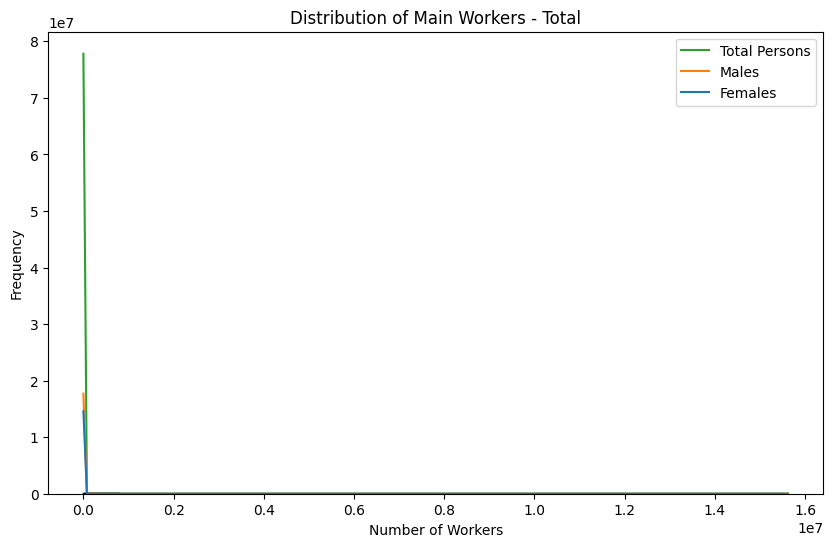

In [104]:
# Main Workers - Total
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total')
plt.show()

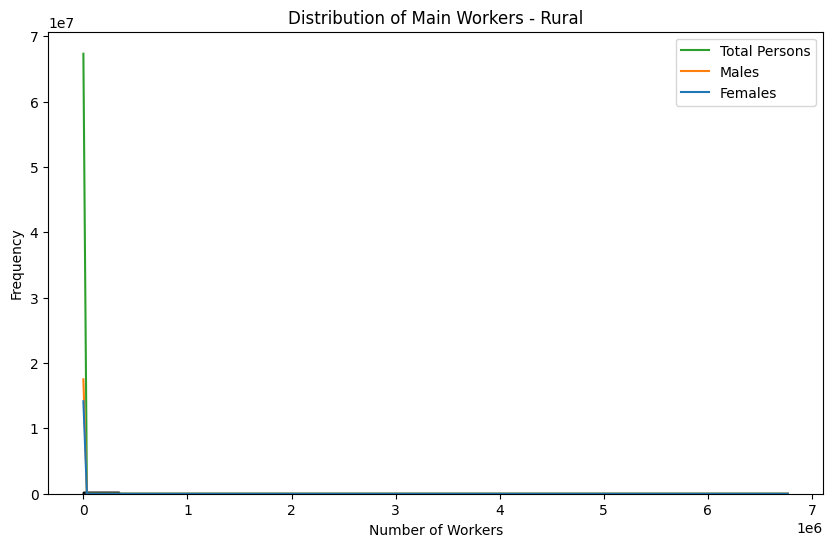

In [105]:
# Main Workers - Rural
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Rural')
plt.show()


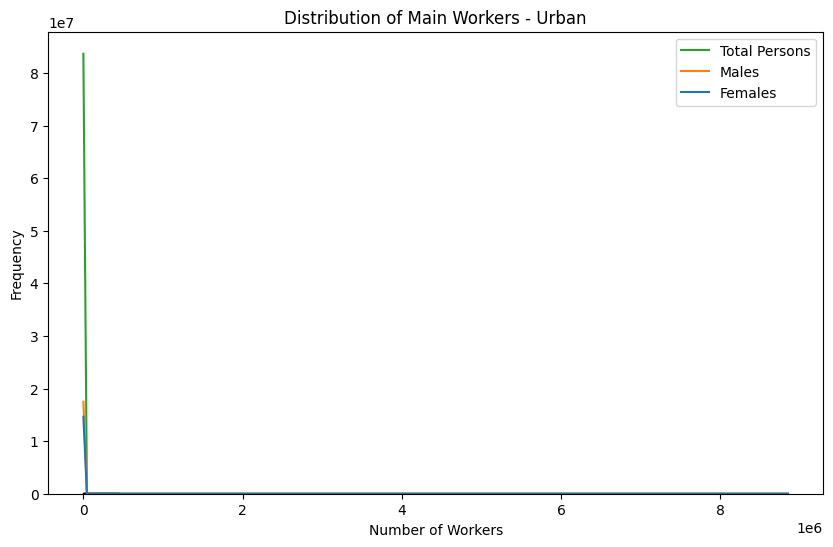

In [106]:
# Main Workers - Urban
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Urban')
plt.show()

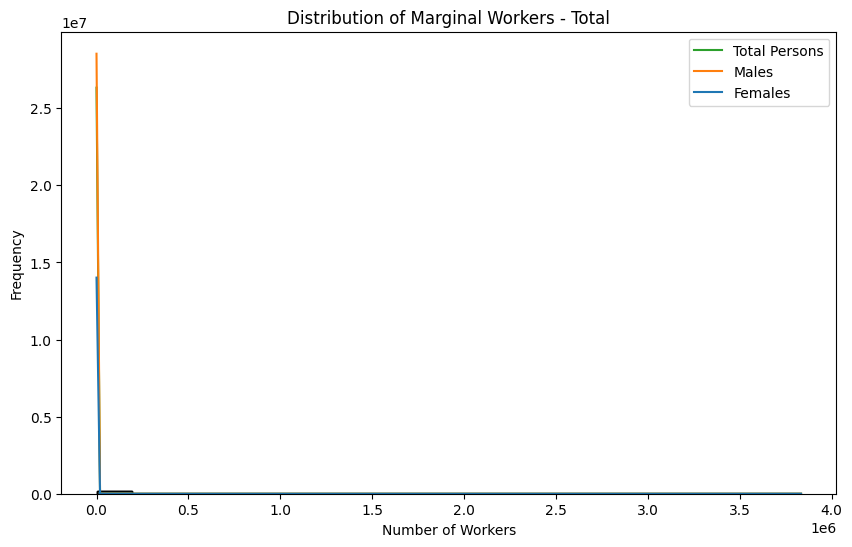

In [107]:
# Marginal Workers - Total
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Total')
plt.show()

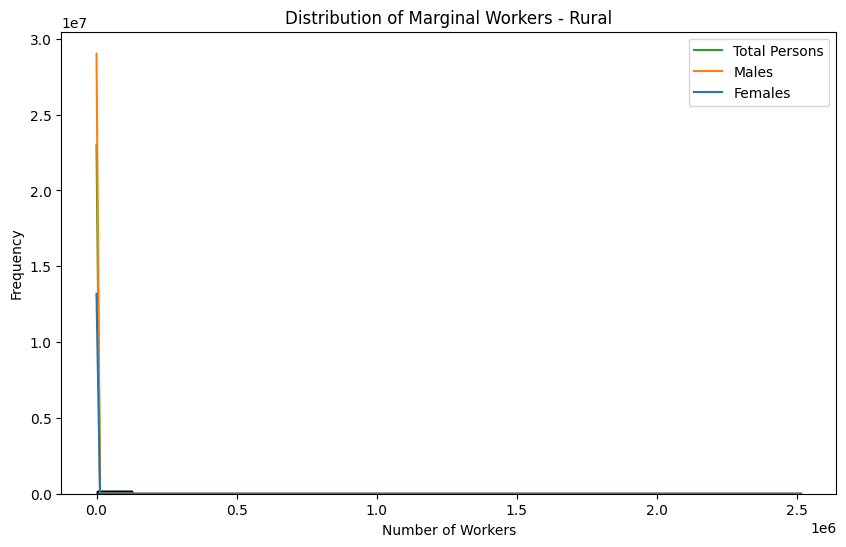

In [108]:
# Marginal Workers - Rural
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Rural')
plt.show()

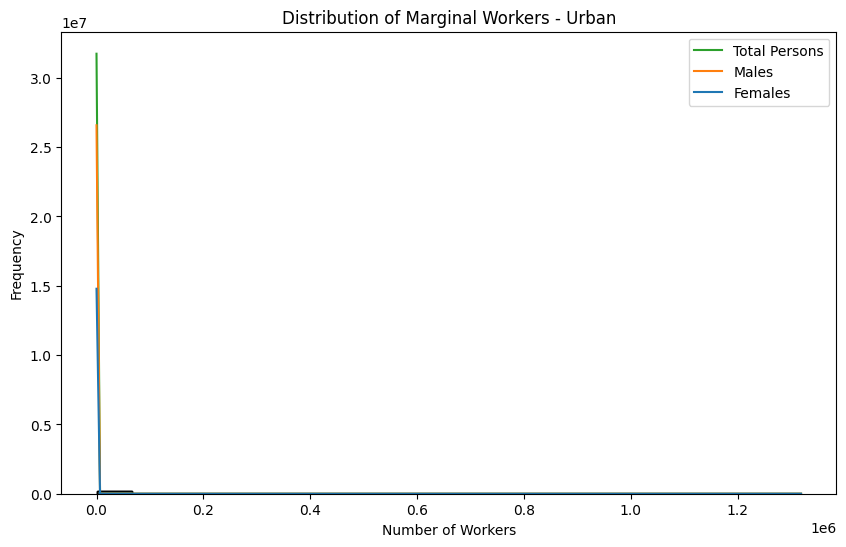

In [109]:
# Marginal Workers - Urban
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Urban')
plt.show()

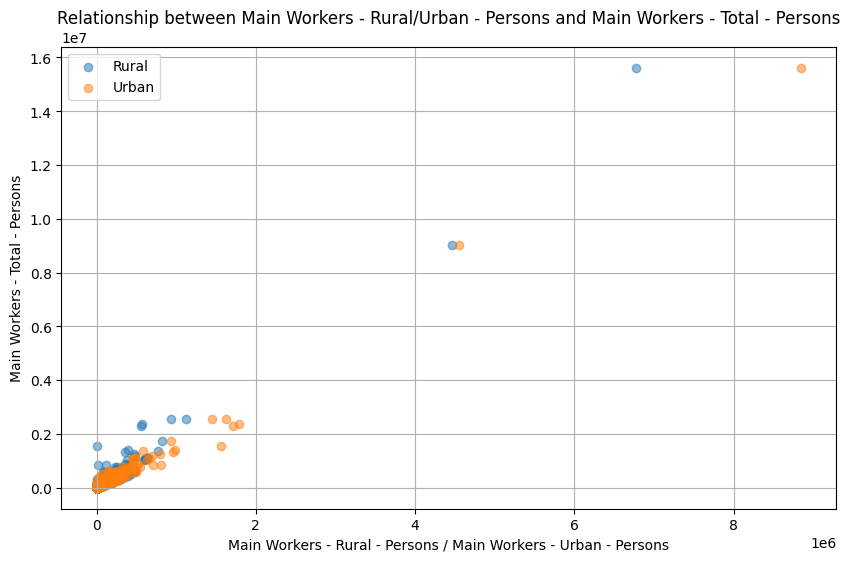

In [110]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Main Workers - Rural -  Persons'], merged_df['Main Workers - Total -  Persons'], label='Rural', alpha=0.5)
plt.scatter(merged_df['Main Workers - Urban -  Persons'], merged_df['Main Workers - Total -  Persons'], label='Urban', alpha=0.5)
plt.xlabel('Main Workers - Rural - Persons / Main Workers - Urban - Persons')
plt.ylabel('Main Workers - Total - Persons')
plt.title('Relationship between Main Workers - Rural/Urban - Persons and Main Workers - Total - Persons')
plt.legend()
plt.grid(True)
plt.show()


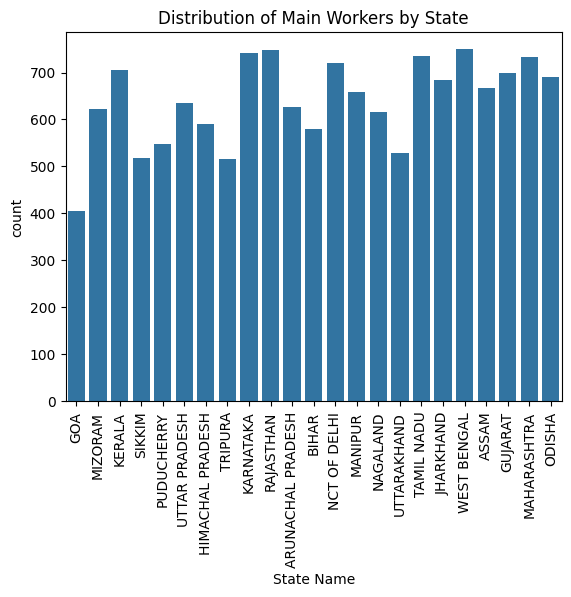

In [111]:
# Count plot for a categorical column
sns.countplot(x='State Name', data=merged_df)
plt.xticks(rotation=90)
plt.title('Distribution of Main Workers by State')
plt.show()


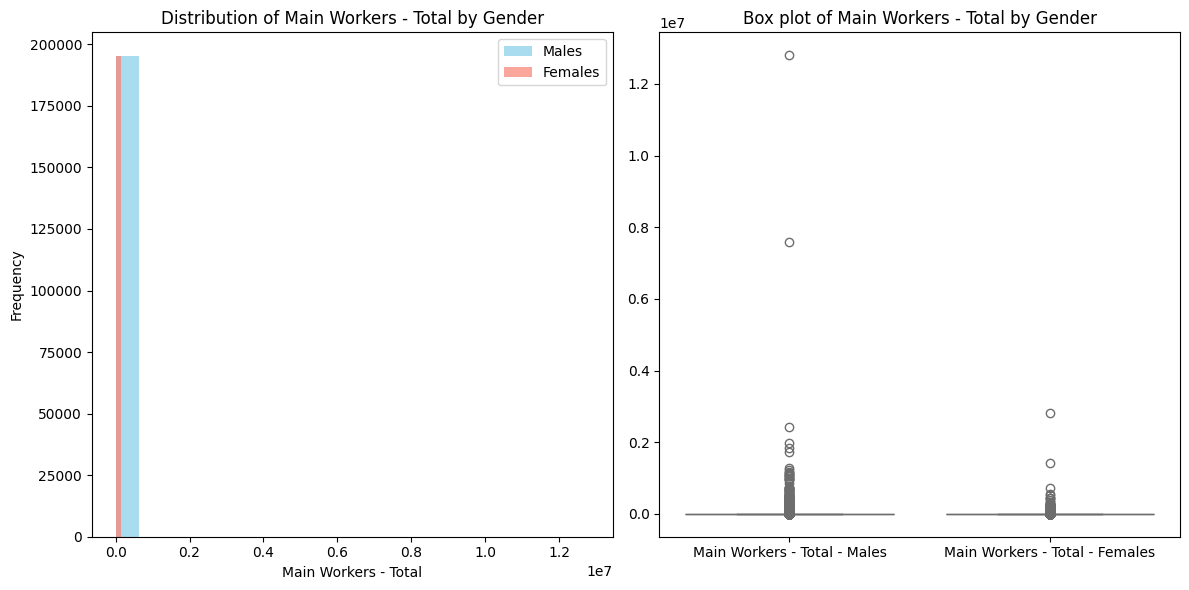

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Main Workers - Total - Persons'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(merged_df['Main Workers - Total - Males'], bins=20, color='skyblue', alpha=0.7, label='Males')
plt.hist(merged_df['Main Workers - Total - Females'], bins=20, color='salmon', alpha=0.7, label='Females')
plt.xlabel('Main Workers - Total')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total by Gender')
plt.legend()

# Box plot for 'Main Workers - Total - Persons'
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df[['Main Workers - Total - Males', 'Main Workers - Total - Females']], palette=['skyblue', 'salmon'])
plt.title('Box plot of Main Workers - Total by Gender')

plt.tight_layout()
plt.show()



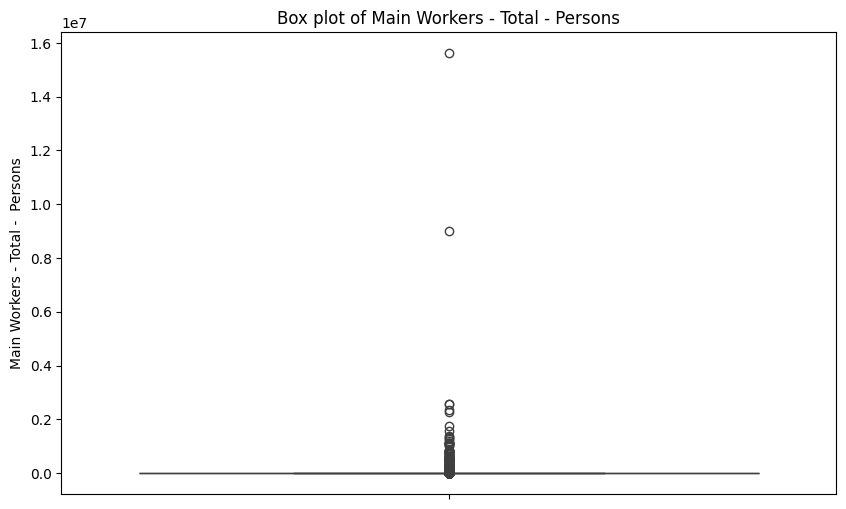

In [113]:
import seaborn as sns

# Box plot for 'Main Workers - Total - Persons'
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['Main Workers - Total -  Persons'])
plt.title('Box plot of Main Workers - Total - Persons')
plt.show()




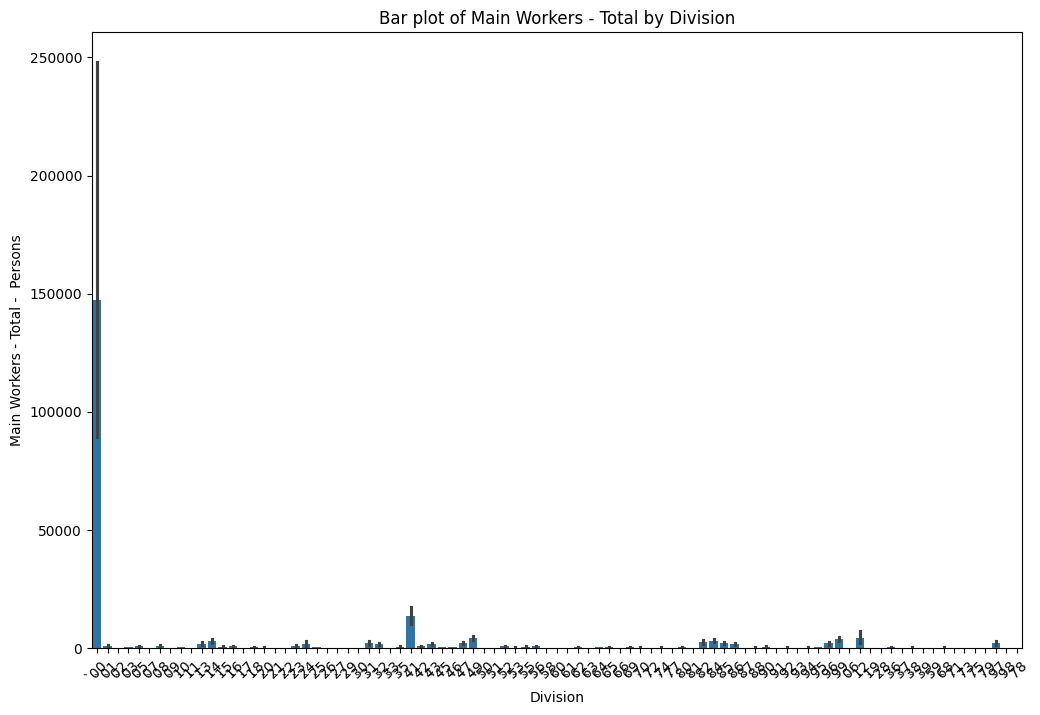

In [114]:
# Bar plot for 'Main Workers - Total' by 'Division'
plt.figure(figsize=(12, 8))
sns.barplot(x='Division', y='Main Workers - Total -  Persons', data=merged_df)
plt.title('Bar plot of Main Workers - Total by Division')
plt.xticks(rotation=45)
plt.show()



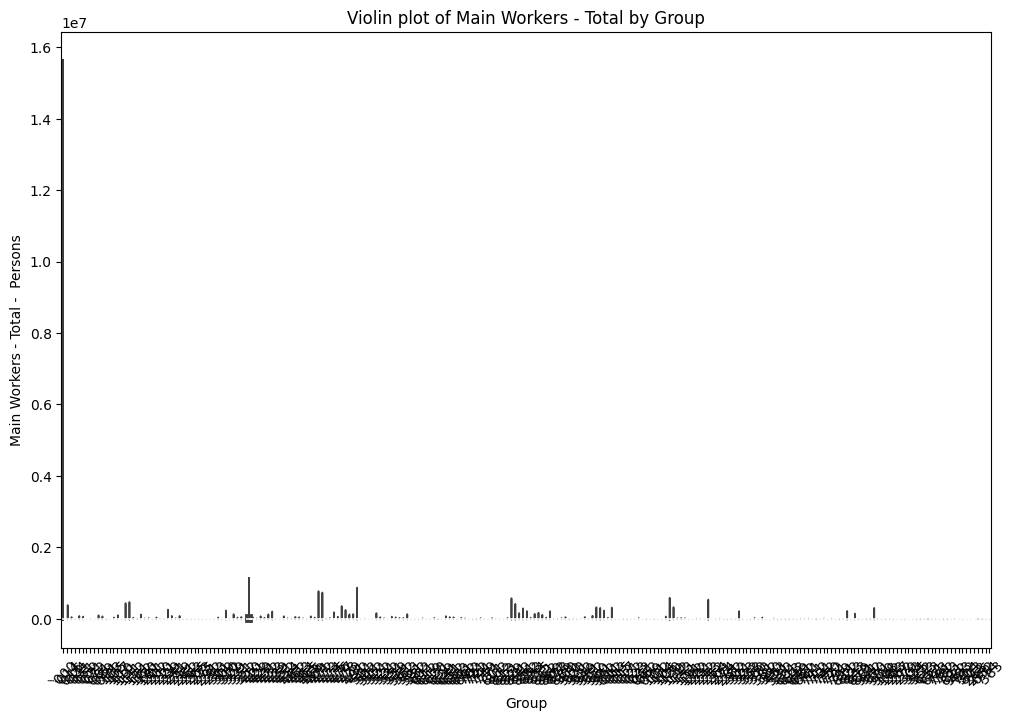

In [115]:
# Violin plot for 'Main Workers - Total' by 'Group'
plt.figure(figsize=(12, 8))
sns.violinplot(x='Group', y='Main Workers - Total -  Persons', data=merged_df)
plt.title('Violin plot of Main Workers - Total by Group')
plt.xticks(rotation=45)
plt.show()



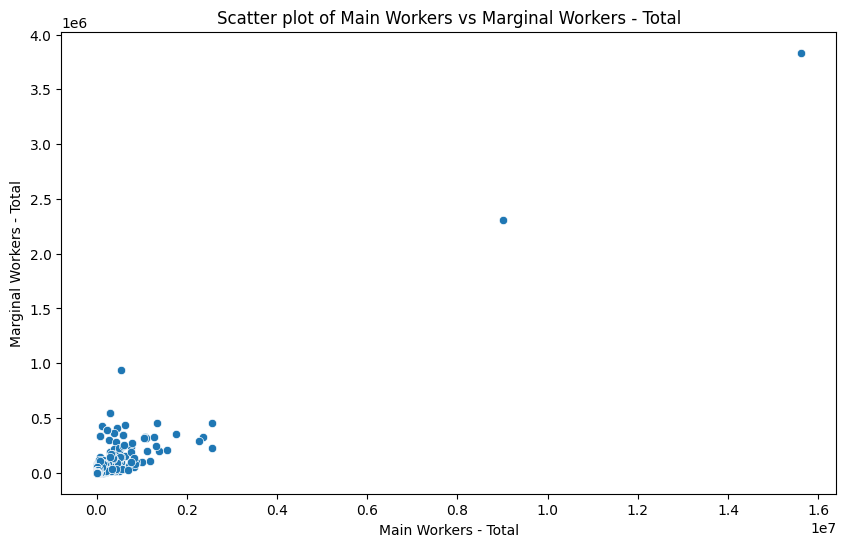

In [116]:
# Scatter plot for 'Main Workers - Total' vs 'Marginal Workers - Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Marginal Workers - Total -  Persons', data=merged_df)
plt.title('Scatter plot of Main Workers vs Marginal Workers - Total')
plt.xlabel('Main Workers - Total')
plt.ylabel('Marginal Workers - Total')
plt.show()

In [117]:
merged_df["Main Workers - Total -  Persons"]

,Main Workers - Total - Persons
0,7573
1,12
2,4
3,4
4,8
...,...
195140,574
195141,435
195142,435
195143,139


In [118]:
merged_df["Main Workers - Total -  Persons"].value_counts().sum()

195145

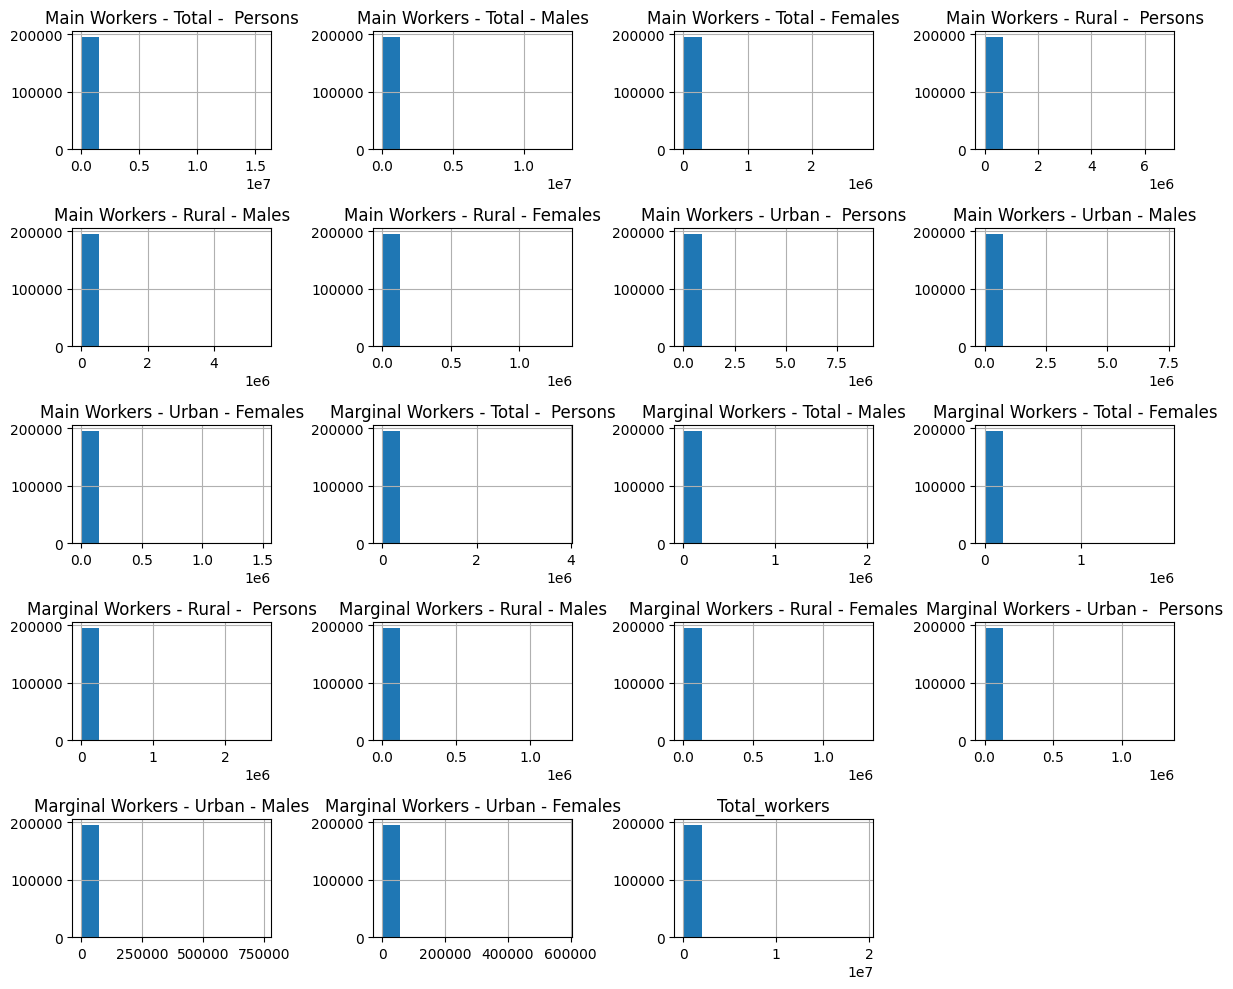

In [119]:
# Histograms for numerical columns
merged_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


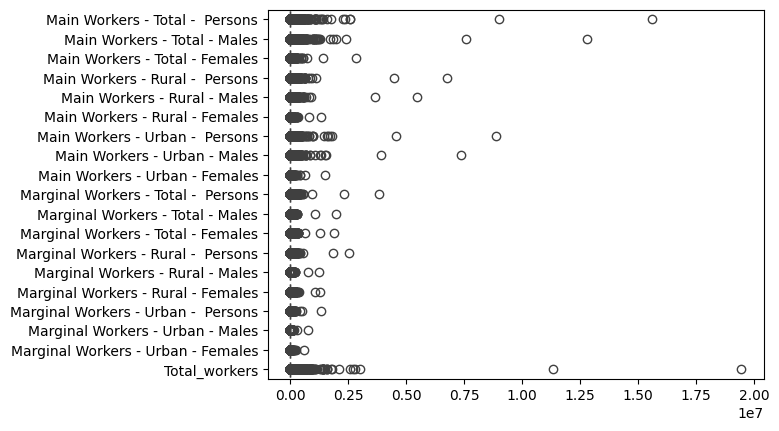

In [120]:
# Box plots for numerical columns
sns.boxplot(data=merged_df, orient="h")
plt.show()

In [121]:
# # Scatter plot for relationship visualization
# sns.pairplot(merged_df)
# plt.show()

In [122]:
# Cross-tabulation between 'Class' and 'Division'
pd.crosstab(merged_df['Class'], merged_df['Division'])


Division,`00,`01,`02,`03,`05,`06,`07,`08,`09,`10,...,`90,`91,`92,`93,`94,`95,`96,`97,`98,`99
Class,,,,,,,,,,,,,,,,,,,,,
`0000,494,2655,1707,901,578,421,412,1108,480,3014,...,826,592,272,877,1229,1209,888,872,314,1549
`0111,0,265,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
`0112,0,200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
`0113,0,253,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
`0114,0,68,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
`9810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,82,0
`9820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,0
`9900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,88


In [123]:
# Visual inspection of distributions
# Statistical methods like Z-score or IQR can be applied as well
# For example, using Z-score to identify and filter outliers
from scipy import stats
import numpy as np
z_scores = stats.zscore(merged_df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
merged_df = merged_df[filtered_entries]



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 146 (\x92) missing from current font.



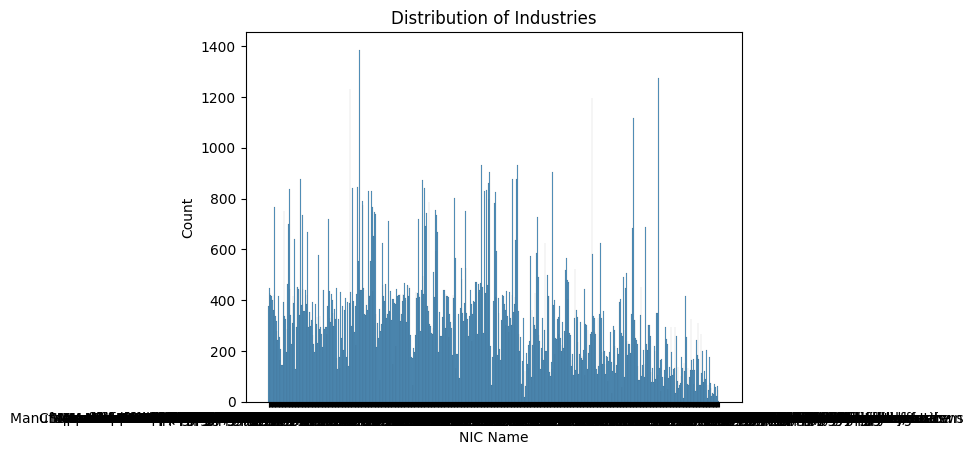

In [124]:
# Visualize distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df['NIC Name'], bins=20)
plt.title('Distribution of Industries')
plt.show()

In [125]:
merged_df.dtypes

,0
State Code,object
District Code,object
India/States,object
Division,object
Group,object
Class,object
NIC Name,object
Main Workers - Total - Persons,int64
Main Workers - Total - Males,int64
Main Workers - Total - Females,int64


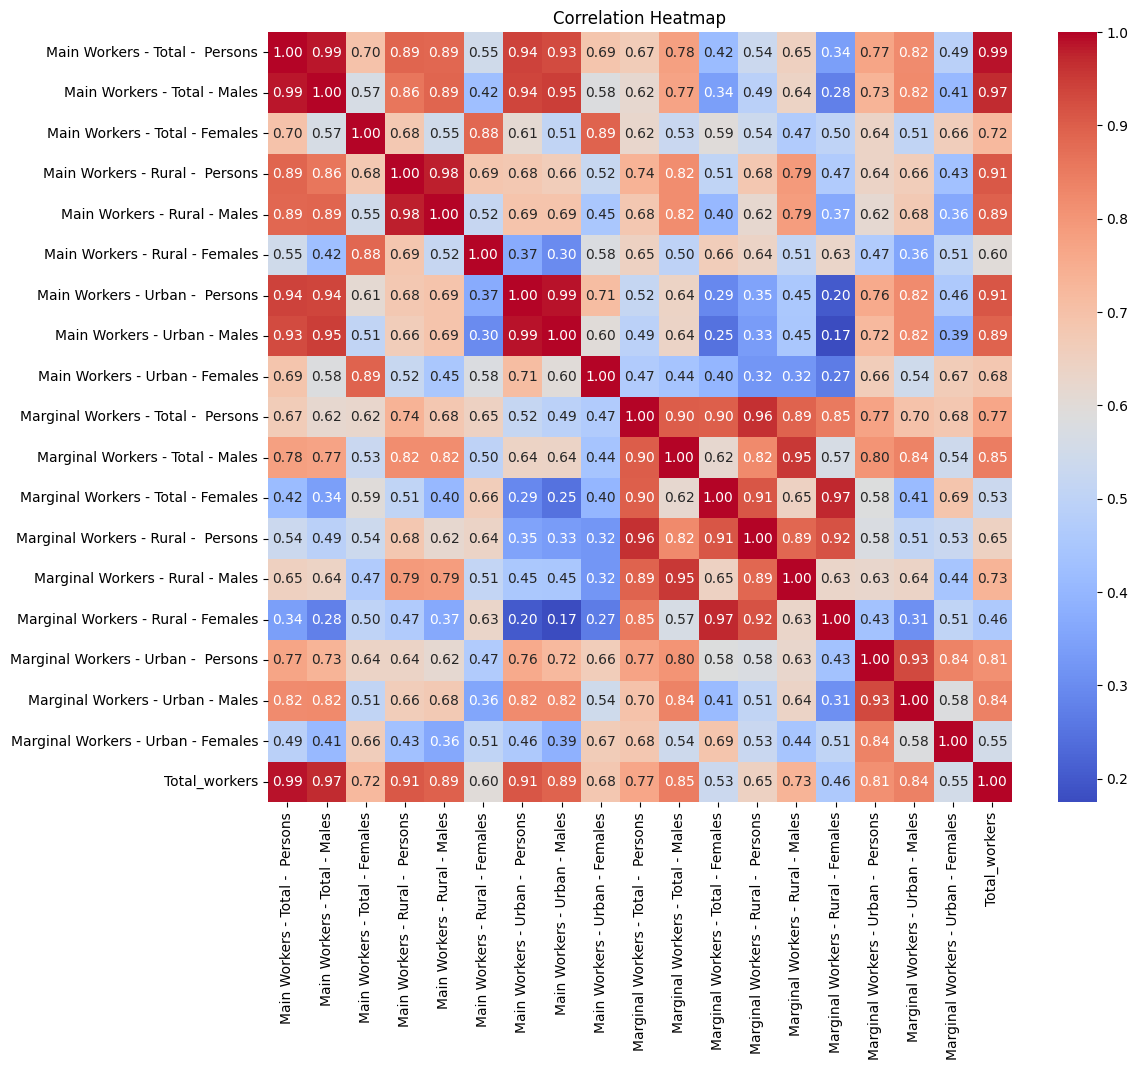

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from the correlation calculation
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = merged_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [127]:
# Remove duplicate rows from the DataFrame
merged_df = merged_df.drop_duplicates()

# Confirm the removal of duplicates
print("Shape after removing duplicates:", merged_df.shape)

Shape after removing duplicates: (194381, 29)


In [128]:
merged_df['District'].unique()

array(['GOA', 'North Goa', 'South Goa', 'MIZORAM', 'Mamit', 'Kolasib',
       'Aizawl', 'Champhai', 'Serchhip', 'Lunglei', 'Lawngtlai', 'Saiha',
       'KERALA', 'Kasaragod', 'Kannur', 'Wayanad', 'Kozhikode',
       'Malappuram', 'Palakkad', 'Thrissur', 'Ernakulam', 'Idukki',
       'Kottayam', 'Alappuzha', 'Pathanamthitta', 'Kollam',
       'Thiruvananthapuram', 'SIKKIM', 'North  District', 'West District',
       'South District', 'East District', 'PUDUCHERRY', 'Yanam',
       'Puducherry', 'Mahe', 'Karaikal', 'UTTAR PRADESH', 'Saharanpur',
       'Muzaffarnagar', 'Bijnor', 'Moradabad', 'Rampur',
       'Jyotiba Phule Nagar', 'Meerut', 'Baghpat', 'Ghaziabad',
       'Gautam Buddha Nagar', 'Bulandshahr', 'Aligarh', 'Mahamaya Nagar',
       'Mathura', 'Agra', 'Firozabad', 'Mainpuri', 'Budaun', 'Bareilly',
       'Pilibhit', 'Shahjahanpur', 'Kheri', 'Sitapur', 'Hardoi', 'Unnao',
       'Lucknow', 'Rae Bareli', 'Farrukhabad', 'Kannauj', 'Etawah',
       'Auraiya', 'Kanpur Dehat', 'Kanpur

In [129]:
# Step 1: Tokenize and Clean Text Data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


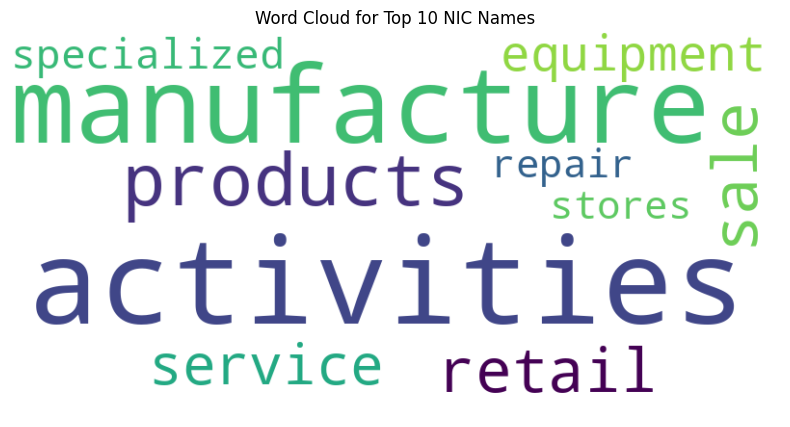

In [130]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


# Tokenize and clean text data
text = ' '.join(merged_df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
top_words = word_freq.most_common(10)

# Create a word cloud using the top words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Display the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top 10 NIC Names')
plt.axis('off')
plt.show()


In [131]:
import plotly.express as px

# Extract the top 10 most common words and their frequencies
top_words = [pair[0] for pair in word_freq.most_common(10)]
word_counts = [pair[1] for pair in word_freq.most_common(10)]

# Create a bar plot using Plotly
fig = px.bar(x=top_words, y=word_counts, labels={'x': 'Industry', 'y': 'Frequency'},
             title='Top 10 Industries by Frequency')
fig.show()


In [132]:
# import os
# import pandas as pd
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')

# # Function to merge CSV files in a folder
# def merge_csv_files(folder_path):
#     try:
#         # List all CSV files in the folder
#         csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

#         # Initialize an empty list to store DataFrame objects
#         dfs = []

#         # Read each CSV file and append its DataFrame to the list
#         for file in csv_files:
#             file_path = os.path.join(folder_path, file)
#             try:
#                 df = pd.read_csv(file_path, encoding='utf-8')
#             except UnicodeDecodeError:
#                 try:
#                     df = pd.read_csv(file_path, encoding='latin-1')
#                 except UnicodeDecodeError:
#                     df = pd.read_csv(file_path, encoding='ISO-8859-1')
#             dfs.append(df)

#         # Concatenate all DataFrames into a single DataFrame
#         merged_df = pd.concat(dfs, ignore_index=True)

#         return merged_df
#     except Exception as e:
#         print("An error occurred:", e)

# # Specify the folder path containing CSV files
# folder_path = r"/content/drive/Othercomputers/My Laptop (1)/Desktop/raj007_projects/ML_PROJECT_NLP/drive-download-20240913T081543Z-001"

# # Merge CSV files in the folder
# merged_df = merge_csv_files(folder_path)

# # Tokenize and clean text data
# text = ' '.join(merged_df['NIC Name'])
# tokens = word_tokenize(text)
# tokens = [word.lower() for word in tokens if word.isalpha()]
# stop_words = set(stopwords.words('english'))
# tokens = [word for word in tokens if word not in stop_words]

# # Count word frequency
# word_freq = Counter(tokens)
# print(word_freq.most_common(10))

# # TF-IDF Vectorization
# tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# X_tfidf = tfidf_vectorizer.fit_transform(merged_df['NIC Name'])

# # KMeans Clustering
# num_clusters = 5  # Adjust the number of clusters as needed
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# merged_df['Cluster'] = kmeans.fit_predict(X_tfidf)

# # Generate word clouds for each cluster
# for cluster in range(num_clusters):
#     text_for_cluster = merged_df[merged_df['Cluster'] == cluster]['NIC Name']
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_for_cluster))
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(f'Word Cloud for Cluster {cluster}')
#     plt.axis('off')
#     plt.show()


In [133]:
merged_df["State Name"]

,State Name
0,GOA
1,GOA
2,GOA
3,GOA
4,GOA
...,...
195140,None
195141,None
195142,None
195143,None


In [134]:
### Step 2: Vectorize the Text Data

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the 'NIC Name' column using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
nic_name_tfidf = vectorizer.fit_transform(merged_df['NIC Name'])



In [136]:
# Step 3: Apply Clustering Algorithm

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Step 2: Scale the numerical columns for clustering
scaler = StandardScaler()
numerical_columns = [
    'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females',
    'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females',
    'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
    'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females',
    'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females',
    'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females'
]
numerical_data_scaled = scaler.fit_transform(merged_df[numerical_columns])

# Step 3: Combine TF-IDF features with scaled numerical data
from scipy.sparse import hstack
combined_features = hstack([nic_name_tfidf, numerical_data_scaled])

# Step 4: Determine the number of clusters and fit the KMeans model
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(combined_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



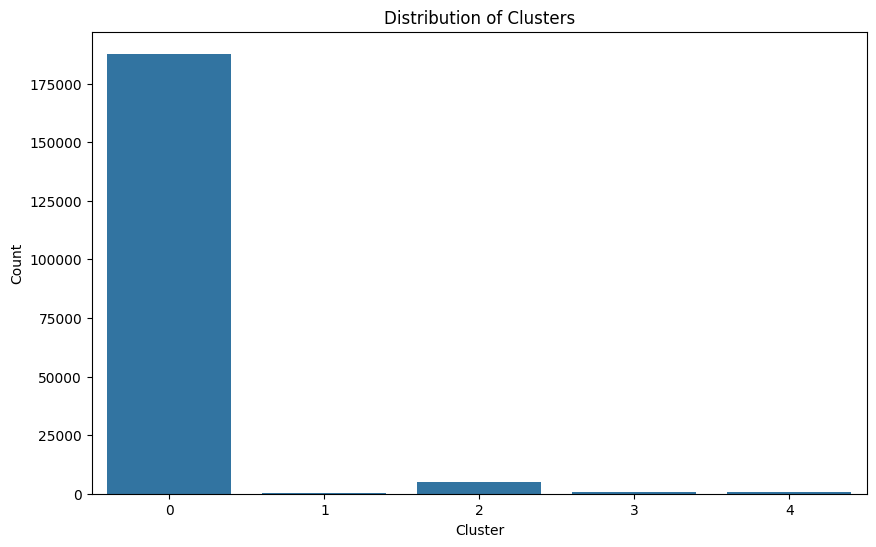

In [138]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=merged_df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [139]:
# Main Workers
# Step 1: Identify Top 10 Most Frequent 'NIC Name' Categories

In [140]:
# Count the frequency of each 'NIC Name'
nic_name_counts = merged_df['NIC Name'].value_counts()

# Get the top 10 most frequent 'NIC Name' categories
top_10_nic_names = nic_name_counts.head(10).index.tolist()


In [141]:
# Step 2: Filter the DataFrame to Include Only Top 10 'NIC Name' Categories

In [142]:
# Filter the DataFrame to include only rows where 'NIC Name' is in the top 10 most frequent categories
top_10_merged_df = merged_df[merged_df['NIC Name'].isin(top_10_nic_names)]


In [143]:
# Step 3: Create the Box Plot

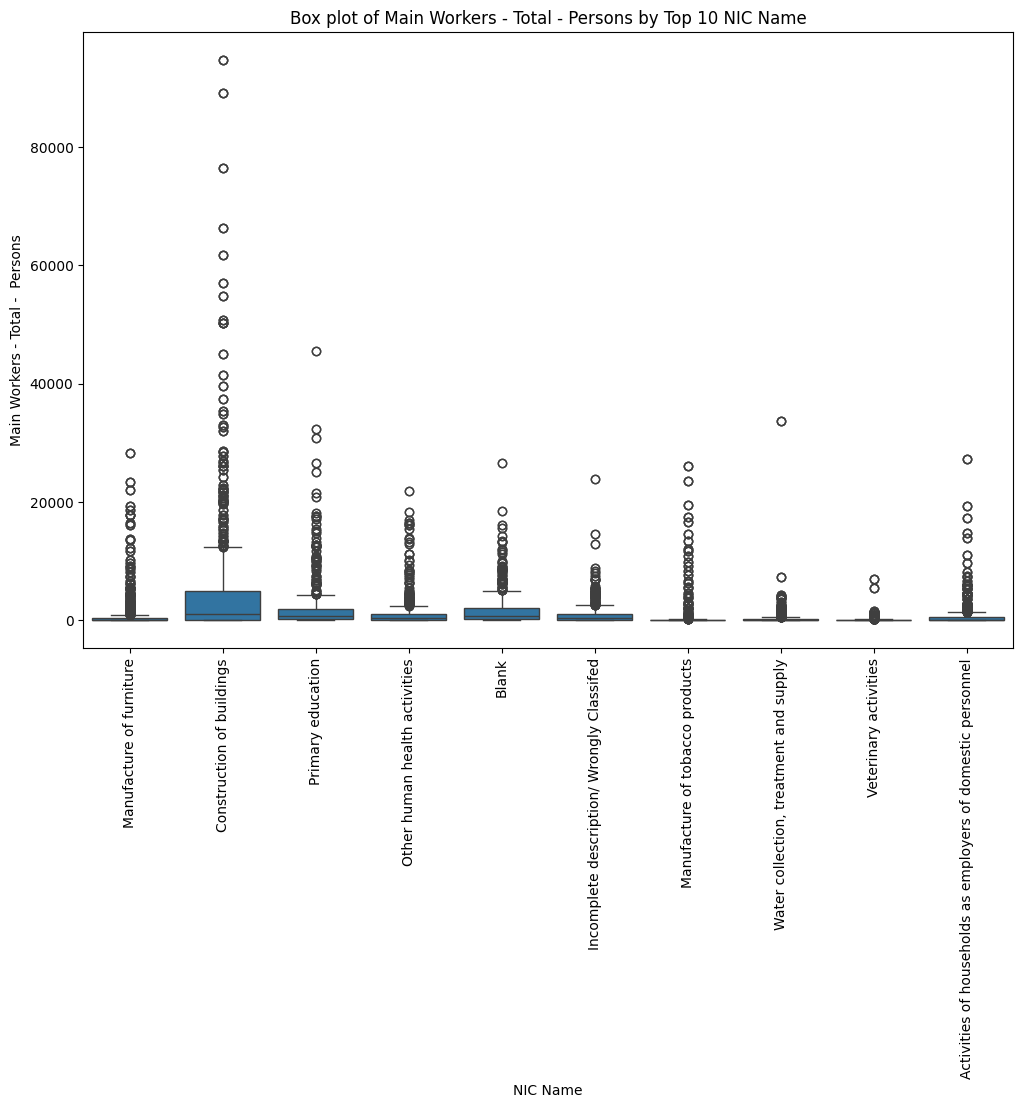

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Main Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name', y='Main Workers - Total -  Persons', data=top_10_merged_df)
plt.title('Box plot of Main Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()


In [145]:
# Step 4: Create Scatter Plots for Main Workers - Total - Persons

# Plot: Main Workers - Total - Persons vs Main Workers - Rural - Persons

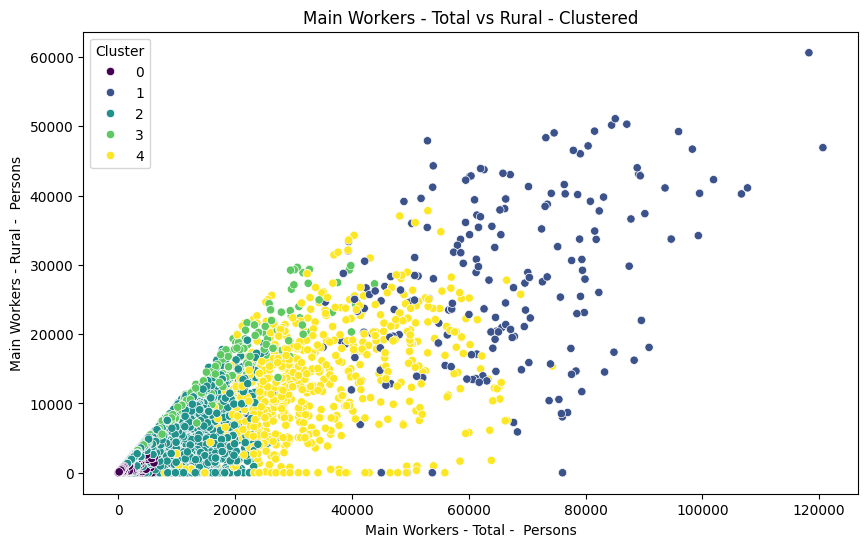

In [146]:
# Scatter plot for 'Main Workers - Total - Persons' vs 'Main Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Main Workers - Rural -  Persons', hue='Cluster', data=merged_df, palette='viridis')
plt.title('Main Workers - Total vs Rural - Clustered')
plt.xlabel('Main Workers - Total -  Persons')
plt.ylabel('Main Workers - Rural -  Persons')
plt.show()



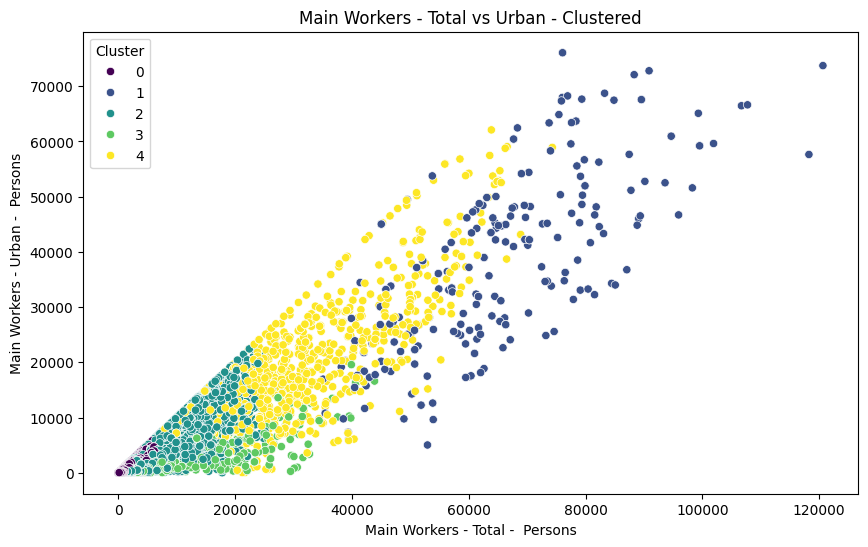

In [147]:
# Scatter plot for 'Main Workers - Total - Persons' vs 'Main Workers - Urban - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Main Workers - Urban -  Persons', hue='Cluster', data=merged_df, palette='viridis')
plt.title('Main Workers - Total vs Urban - Clustered')
plt.xlabel('Main Workers - Total -  Persons')
plt.ylabel('Main Workers - Urban -  Persons')
plt.show()




In [148]:

# Marginal Workers

# Step 5: Create the Box Plot for Marginal Workers - Total - Persons

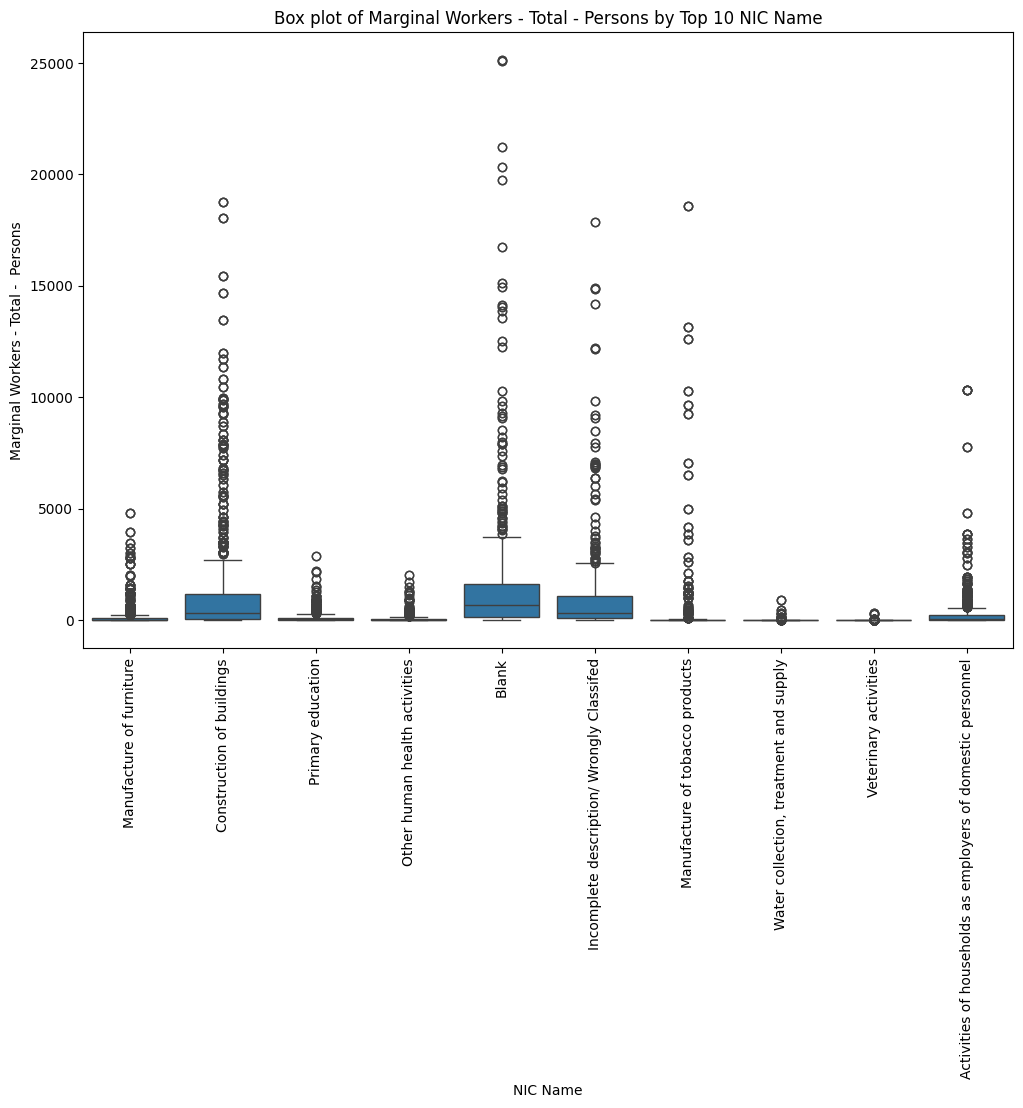

In [149]:
# Box plot for 'Marginal Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name', y='Marginal Workers - Total -  Persons', data=top_10_merged_df)
plt.title('Box plot of Marginal Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()


In [150]:
# Step 6: Create Scatter Plots for Marginal Workers - Total - Persons

# Plot: Marginal Workers - Total - Persons vs Marginal Workers - Rural - Persons

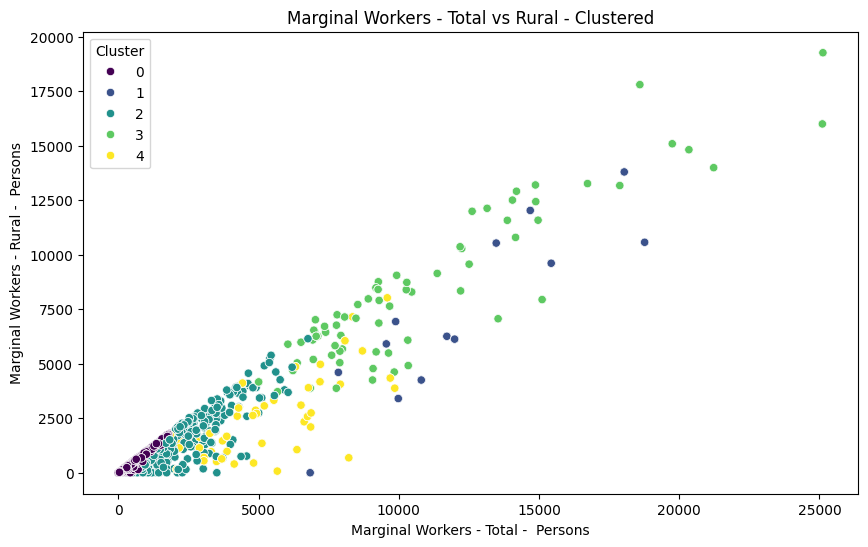

In [151]:
# Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Rural -  Persons', hue='Cluster', data=top_10_merged_df, palette='viridis')
plt.title('Marginal Workers - Total vs Rural - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Rural -  Persons')
plt.show()




In [152]:
# Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Urban - Persons'

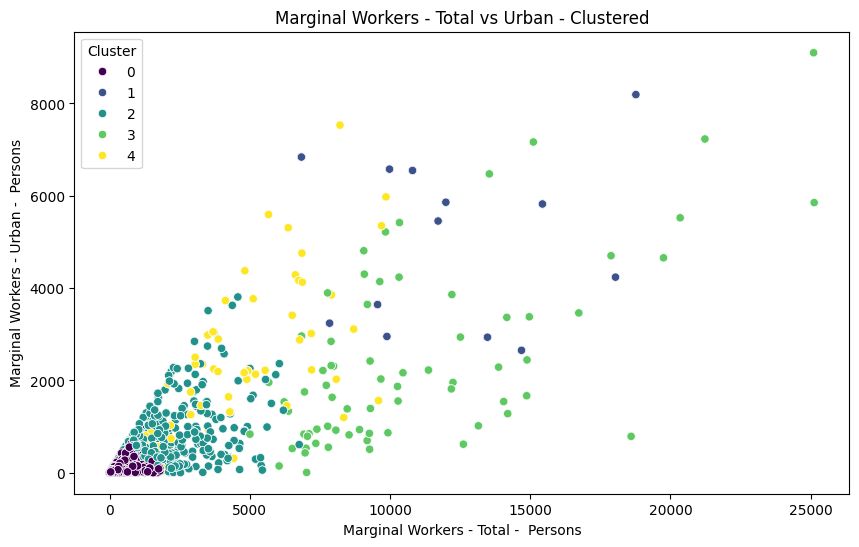

In [153]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Urban -  Persons', hue='Cluster', data=top_10_merged_df, palette='viridis')
plt.title('Marginal Workers - Total vs Urban - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Urban -  Persons')
plt.show()

In [154]:
merged_df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,STATE,District,State Name,Total_workers,Cluster
0,`30,`000,STATE - GOA,`00,`000,`0000,Total,7573,5536,2037,...,456,364,964,569,395,STATE,GOA,GOA,9357,2
1,`30,`000,STATE - GOA,`01,`000,`0000,"Crop and animal production, hunting and relate...",12,8,4,...,6,0,3,3,0,STATE,GOA,GOA,21,0
2,`30,`000,STATE - GOA,`01,`014,`0000,Animal production,4,0,4,...,0,0,0,0,0,STATE,GOA,GOA,4,0
3,`30,`000,STATE - GOA,`01,`014,`0141,Raising of cattle and buffaloes,4,0,4,...,0,0,0,0,0,STATE,GOA,GOA,4,0
4,`30,`000,STATE - GOA,`01,`016,`0000,Support activities to agriculture and post-har...,8,8,0,...,6,0,3,3,0,STATE,GOA,GOA,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`21,`399,District - Malkangiri,`99,`000,`0000,Activities of extraterritorial organizations a...,574,315,259,...,286,890,46,8,38,District,Malkangiri,None,1796,0
195141,`21,`399,District - Malkangiri,`99,`991,`0000,Blank,435,266,169,...,198,360,28,4,24,District,Malkangiri,None,1021,0
195142,`21,`399,District - Malkangiri,`99,`991,`9910,Blank,435,266,169,...,198,360,28,4,24,District,Malkangiri,None,1021,0
195143,`21,`399,District - Malkangiri,`99,`992,`0000,Incomplete description/ Wrongly Classifed,139,49,90,...,88,530,18,4,14,District,Malkangiri,None,775,0


In [155]:
# Model building

In [156]:
# import pandas as pd

# # Check for non-numeric values in a DataFrame
# def check_non_numeric(df):
#     non_numeric_cols = []
#     for col in df.columns:
#         try:
#             pd.to_numeric(df[col])
#         except ValueError:
#             non_numeric_cols.append(col)
#     return non_numeric_cols

# # Call the function to check for non-numeric values
# non_numeric_columns = check_non_numeric(merged_df)
# print("Columns with non-numeric values:", non_numeric_columns)


In [157]:
# # Remove backticks from the 'Class' column
# merged_df['Class'] = merged_df['Class'].str.replace('`', '')

# # Convert 'Class' column to numeric
# merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

In [158]:
# from sklearn.preprocessing import LabelEncoder, FunctionTransformer
# # Define columns to encode
# columns_to_encode = ['State Code', 'District Code','India/States', 'Division', 'Group','NIC Name','STATE', 'District', 'State Name']

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Encode categorical columns
# for column in columns_to_encode:
#     merged_df[column] = label_encoder.fit_transform(merged_df[column])

# # Check data types after encoding
# print(merged_df.dtypes)

# # Now, X_nic_name contains the TF-IDF transformed 'NIC Name' data, and merged_df_encoded contains the encoded categorical variables.

In [159]:
# import pandas as pd
# import numpy as np
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming 'Class' is the target variable
# X = merged_df.drop(columns=['Class'])  # Features
# y = merged_df['Class']  # Target

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Test the model
# y_pred = model.predict(X_test)

# # Evaluate the model
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('R² score:', r2_score(y_test, y_pred))

In [160]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(merged_df)
print("Columns with non-numeric values:", non_numeric_columns)


Columns with non-numeric values: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name', 'STATE', 'District', 'State Name']


In [161]:
# Remove backticks from the 'Class' column
merged_df['Class'] = merged_df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

In [162]:
# Define columns to encode
categorical_features = ['State Code', 'District Code', 'India/States', 'Division', 'Group']
text_column = 'NIC Name'

# Define preprocessing steps for categorical features and text column
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer(stop_words='english')

# Create a preprocessor to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_column)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into features and target
X = merged_df.drop(columns=['Class'])  # Features
y = merged_df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² score:', r2_score(y_test, y_pred))



Mean Absolute Error: 1120.5892967336322
Mean Squared Error: 3659291.6994683743
Root Mean Squared Error: 1912.9275207044238
R² score: 0.6079210558201663


In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(merged_df)
print("Columns with non-numeric values:", non_numeric_columns)

# Remove backticks from the 'Class' column
# merged_df['Class'] = merged_df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
# merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

# Define columns to encode
# categorical_features = ['State Code', 'District Code', 'India/States', 'Division', 'Group']
# text_column = 'NIC Name'

# Define preprocessing steps for categorical features and text column
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer(stop_words='english')

# Create a preprocessor to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_column)
    ])

# Define the model pipeline for logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split data into features and target
X = merged_df.drop(columns=['Class'])  # Features
y = merged_df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))



Columns with non-numeric values: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'NIC Name', 'STATE', 'District', 'State Name']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.6058852277696324
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61     19205
         111       1.00      1.00      1.00        47
         112       1.00      1.00      1.00        41
         113       1.00      1.00      1.00        49
         114       1.00      1.00      1.00        20
         115       1.00      1.00      1.00         4
         116       1.00      1.00      1.00        17
         119       1.00      1.00      1.00        29
         121       1.00      1.00      1.00         3
         122       1.00      1.00      1.00        30
         123       1.00      1.00      1.00         8
         124       1.00      1.00      1.00        12
         125       1.00      1.00      1.00        38
         126       1.00      1.00      1.00        35
         127       1.00      1.00      1.00        35
         128       1.00      1.00      1.00        27
         129       0.04      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [162]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import requests
import streamlit as st
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from streamlit_option_menu import option_menu
from PIL import Image
import nltk



# Download NLTK stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')
# Setting up page configuration
# Setting up page configuration
icon = Image.open(r"C:\Users\Dell\OneDrive\Desktop\raj007_projects\ML_PROJECT_NLP\agri2.jpeg")


st.set_page_config(page_title="Industrial Human Resource  | By Raja007",
                   page_icon=icon,
                   layout="wide",
                   initial_sidebar_state="expanded",
                   menu_items={'About': """# This dashboard app is created by *Raja007*!"""})

# Creating option menu in the sidebar
with st.sidebar:
    selected = option_menu("Menu", ["Home", "Overview", "Explore"],
                           icons=["house", "graph-up-arrow", "bar-chart-line"],
                           menu_icon="menu-button-wide",
                           default_index=0,
                           styles={"nav-link": {"font-size": "20px", "text-align": "left", "margin": "-2px",
                                                "--hover-color": "#FF5A5F"},
                                   "nav-link-selected": {"background-color": "#FF5A5F"}}
                           )


# Based on the selected option, display the appropriate page
# Function to merge CSV files in a folder
def merge_csv_files(folder_path):
    try:
        # List all CSV files in the folder
        csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

        # Initialize an empty list to store DataFrame objects
        dfs = []

        # Read each CSV file and append its DataFrame to the list
        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            try:
                # Try reading the CSV file with different encodings
                df = pd.read_csv(file_path, encoding='utf-8-sig')  # Try utf-8-sig encoding
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='latin-1')
                except UnicodeDecodeError:
                    df = pd.read_csv(file_path, encoding='ISO-8859-1')
            dfs.append(df)

        # Concatenate all DataFrames into a single DataFrame
        merged_df = pd.concat(dfs, ignore_index=True)

        return merged_df
    except Exception as e:
        print("An error occurred:", e)


# Specify the folder path containing CSV files
folder_path = r"C:\Users\Dell\OneDrive\Desktop\raj007_projects\ML_PROJECT_NLP\drive-download-20240913T081543Z-001"

# Merge CSV files in the folder
merged_df = merge_csv_files(folder_path)

# Print merged DataFrame for debugging
print("Merged DataFrame:", merged_df)

# Print column names for debugging
print("Column names:", merged_df.columns)

# Print number of rows for debugging
print("Number of rows:", len(merged_df))

# Further processing...


# -----------------------------------------------------------------------------------------------------------------------------------------------------#
# Separate state and district names
merged_df[['STATE', 'District']] = merged_df['India/States'].str.split(' - ', expand=True)


# Function to separate state and district names
def separate_state_district(row):
    # Split the string based on the separator '-'
    parts = row.split(' - ')

    # If the first part is in uppercase (assumed to be state name), return it
    if parts[0].isupper():
        return parts[0]
    else:
        return None


# Apply the function to create a new column for state names
merged_df['State Name'] = merged_df['District'].apply(separate_state_district)

# Filter out None values and then print unique state names with commas
state_names = merged_df['State Name'].dropna().unique()
print(", ".join(state_names))

# Create a mapping dictionary for state names
state_name_mapping = {
    'ANDHRA PRADESH': 'Andhra Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh',
    'ASSAM': 'Assam',
    'BIHAR': 'Bihar',
    'CHHATTISGARH': 'Chhattisgarh',
    'GOA': 'Goa',
    'GUJARAT': 'Gujarat',
    'HARYANA': 'Haryana',
    'HIMACHAL PRADESH': 'Himachal Pradesh',
    'JAMMU AND KASHMIR': 'Jammu & Kashmir',
    'JHARKHAND': 'Jharkhand',
    'KARNATAKA': 'Karnataka',
    'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh',
    'MAHARASHTRA': 'Maharashtra',
    'MANIPUR': 'Manipur',
    'MEGHALAYA': 'Meghalaya',
    'MIZORAM': 'Mizoram',
    'NAGALAND': 'Nagaland',
    'ODISHA': 'Orissa',
    'PUNJAB': 'Punjab',
    'RAJASTHAN': 'Rajasthan',
    'SIKKIM': 'Sikkim',
    'TAMIL NADU': 'Tamil Nadu',
    'TELANGANA': 'Telangana',
    'TRIPURA': 'Tripura',
    'UTTAR PRADESH': 'Uttar Pradesh',
    'UTTARAKHAND': 'Uttaranchal',
    'WEST BENGAL': 'West Bengal',
    'ANDAMAN AND NICOBAR ISLANDS': 'Andaman & Nicobar Island',
    'CHANDIGARH': 'Chandigarh',
    'DADRA AND NAGAR HAVELI AND DAMAN AND DIU': 'Dadra & Nagar Haveli & Daman & Diu',
    'LAKSHADWEEP': 'Lakshadweep',
    'NCT OF DELHI': 'Delhi',
    'PUDUCHERRY': 'Puducherry'
}

# Apply the mapping to normalize state names
merged_df['State Name'] = merged_df['State Name'].apply(lambda x: state_name_mapping.get(x, x))

# Check and print normalized state names
print(merged_df['State Name'].unique())

# ---------------------------------------------------------------------------------------------------------------------------------------------------#

if selected == "Home":
    # Set the title and image for the home page
    st.title("Industrial Human Resource Geo-Visualization")
    image = Image.open(r"F:\image2.png")
    st.image(image, use_column_width=True)

    # Dataset
    st.subheader("About the Dataset:")
    st.write(
        "Our dataset comprises state-wise counts of main and marginal workers across diverse industries, including manufacturing, construction, retail, and more.")

    # Introduction
    st.write(
        "Explore the dynamic landscape of India's workforce with our Industrial Human Resource Geo-Visualization project.")
    st.write(
        "Gain insights into employment trends, industry distributions, and economic patterns to drive informed decision-making and policy formulation.")

    # Key Features
    st.subheader("Key Features:")
    st.markdown("""
    - **Data Exploration:** Dive deep into state-wise industrial classification data.
    - **Visualization:** Interactive charts and maps for intuitive data exploration.
    - **Natural Language Processing:** Analyze and categorize core industries using NLP techniques.
    - **Insights and Analysis:** Extract actionable insights to support policy-making and resource management.
    """)

    # About the Project
    st.subheader("About the Project:")
    st.write("Our project aims to:")
    st.markdown("""
    - Update and refine the industrial classification data of main and marginal workers.
    - Provide accurate and relevant information for policy-making and employment planning.
    - Empower stakeholders with actionable insights to foster economic growth and development.
    """)

# -------------------------------------------------------------------------------------------------------------------------------------------------------#


if selected == "Overview":

    # Dataset
    st.subheader("Dataset Overview:")
    st.write("Our dataset includes:")
    st.markdown("""
    - State-wise counts of main and marginal workers across various industries.
    - Gender-based distribution of workforce in different sectors.
    - Historical data for trend analysis and forecasting.
    """)

    # Technologies Used
    st.subheader("Technologies Utilized:")
    st.write("We leverage cutting-edge technologies such as:")
    st.markdown("""
    - Python for data processing and analysis.
    - Streamlit for interactive visualization.
    - Plotly and Matplotlib for creating insightful charts.
    - NLTK for Natural Language Processing tasks.
    """)

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    X_tfidf = tfidf_vectorizer.fit_transform(merged_df['NIC Name'])

    # KMeans Clustering
    num_clusters = 5  # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    merged_df['Cluster'] = kmeans.fit_predict(X_tfidf)

    # Selectbox for choosing the cluster
    selected_cluster = st.selectbox('Select Cluster', range(num_clusters))

    # Filter text data for the selected cluster
    text_for_cluster = merged_df[merged_df['Cluster'] == selected_cluster]['NIC Name']

    # Tokenize and clean text data
    tokens = word_tokenize(' '.join(text_for_cluster))
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Count word frequency
    word_freq = Counter(tokens)

    # Generate word cloud for the selected cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

    # Display the word cloud in Streamlit
    st.subheader(f'Word Cloud for Cluster {selected_cluster}')
    st.image(wordcloud.to_array(), caption='Word Cloud', use_column_width=True)

    # Streamlit app
    st.title('Cluster Distribution')

    # Visualize the clustering results
    st.subheader('Distribution of Clusters (Pie Chart)')

    # Count the occurrences of each cluster
    cluster_counts = merged_df['Cluster'].value_counts()

    # Convert counts to a pie chart
    fig, ax = plt.subplots()
    ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    st.pyplot(fig)

    # Filter options for work type
    work_type_options = ['Main Workers - Total -  Persons', 'Marginal Workers - Total -  Persons']
    selected_work_type = st.selectbox("Select Work Type:", work_type_options)

    # Filter for top 10 NIC Names based on the selected work type
    top_10_nic_names = merged_df.groupby('NIC Name')[selected_work_type].sum().nlargest(10).index
    top_10_merged_df = merged_df[merged_df['NIC Name'].isin(top_10_nic_names)]

    # Plotting the box plot using Seaborn and Matplotlib
    st.subheader(f'Box Plot of {selected_work_type} by Top 10 NIC Name')

    # Calculate total values for each NIC Name
    top_10_nic_names_totals = top_10_merged_df.groupby('NIC Name')[selected_work_type].sum().reset_index()

    # Create the treemap
    fig = px.treemap(top_10_nic_names_totals, path=['NIC Name'], values=selected_work_type,
                     title=f'Treemap of {selected_work_type} by Top 10 NIC Name')
    st.plotly_chart(fig)
# ---------------------------------------------------------------------------------------------------------------------------------------------------#

elif selected == "Explore":
    # Tokenize and clean text data
    text = ' '.join(merged_df['NIC Name'])
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Count word frequency
    word_freq = Counter(tokens)
    top_words = word_freq.most_common(10)

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    X_tfidf = tfidf_vectorizer.fit_transform(merged_df['NIC Name'])

    # KMeans Clustering
    num_clusters = 5  # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    merged_df['Cluster'] = kmeans.fit_predict(X_tfidf)

    # Streamlit App
    st.title("Industrial Human Resource  Dashboard")

    # Select box for type of worker
    worker_type = st.selectbox('Select Worker Type', ['Main Workers', 'Marginal Workers'])

    # Column mapping
    if worker_type == 'Main Workers':
        column_total = 'Main Workers - Total -  Persons'
        column_rural = 'Main Workers - Rural -  Persons'
        column_urban = 'Main Workers - Urban -  Persons'
    else:
        column_total = 'Marginal Workers - Total -  Persons'
        column_rural = 'Marginal Workers - Rural -  Persons'
        column_urban = 'Marginal Workers - Urban -  Persons'

    # Strip any extra spaces from column names
    merged_df.columns = [col.strip() for col in merged_df.columns]

    # Print DataFrame columns for debugging
    print("DataFrame Columns:", merged_df.columns)

    # Scatter Plot
    fig1 = px.scatter(merged_df, x=column_total, y=column_rural, color='Cluster',
                      title=f'{worker_type} - Total vs Rural')
    st.plotly_chart(fig1)

    fig2 = px.scatter(merged_df, x=column_total, y=column_urban, color='Cluster',
                      title=f'{worker_type} - Total vs Urban')
    st.plotly_chart(fig2)

    # Box Plot for Top 10 NIC Names
    top_10_nic_names = merged_df['NIC Name'].value_counts().head(10).index
    top_10_df = merged_df[merged_df['NIC Name'].isin(top_10_nic_names)]

    fig3 = px.box(top_10_df, x='NIC Name', y=column_total, title=f'{worker_type} by Top 10 NIC Names')
    st.plotly_chart(fig3)

    # Cluster Distribution
    fig4 = px.histogram(merged_df, x='Cluster', title='Cluster Distribution')
    st.plotly_chart(fig4)

    # Count plot for a categorical column
    st.subheader(f"Distribution of {worker_type} by State")

    # Set the color palette
    sns.set_palette("bright")  # You can choose different palettes like "pastel", "deep", "bright", etc.

    # Create the plot
    fig, ax = plt.subplots()
    sns.countplot(x='State Name', data=merged_df, ax=ax)
    plt.xticks(rotation=90)
    st.pyplot(fig)

    # Plot
    st.subheader(f'Relationship between {worker_type} - Rural/Urban - Persons and {worker_type} - Total - Persons')

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(merged_df[f'{worker_type} - Rural -  Persons'], merged_df[f'{worker_type} - Total -  Persons'],
               label='Rural', alpha=0.5)
    ax.scatter(merged_df[f'{worker_type} - Urban -  Persons'], merged_df[f'{worker_type} - Total -  Persons'],
               label='Urban', alpha=0.5)
    ax.set_xlabel(f'{worker_type} - Rural - Persons / {worker_type} - Urban - Persons')
    ax.set_ylabel(f'{worker_type} - Total - Persons')
    ax.set_title(f'Relationship between {worker_type} - Rural/Urban - Persons and {worker_type} - Total - Persons')
    ax.legend()
    ax.grid(True)

    # Display the plot
    st.pyplot(fig)

    # Create a word cloud using the top words
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

    # Display the word cloud in Streamlit
    st.subheader('Word Cloud for Top 10 NIC Names')
    st.image(wordcloud.to_array(), caption='Word Cloud', use_column_width=True)

    merged_df = merged_df.dropna(subset=['State Name'])


    # Fetch GeoJSON data for India's states
    @st.cache_resource
    def fetch_geojson():
        geojson_url = "https://raw.githubusercontent.com/geohacker/india/master/state/india_state.geojson"
        response = requests.get(geojson_url)
        if response.status_code == 200:
            return response.json()
        else:
            st.error("Failed to fetch GeoJSON data")


    # Main Streamlit App
    def main():
        st.title("India Map Visualization")

        # Fetch GeoJSON data
        geojson_data = fetch_geojson()

        # Extract state names from GeoJSON data
        geojson_state_names = set(feature['properties']['NAME_1'] for feature in geojson_data['features'])

        # State names from DataFrame
        dataframe_state_names = set(merged_df['State Name'])

        # Select box for type of worker
        worker_type = st.selectbox('Select Worker Type', ['Main Workers', 'Marginal Workers'],
                                   key="worker_type_selectbox")

        # Select box for sex
        sex_type = st.selectbox('Select Sex', ['Males', 'Females'], key="sex_type_selectbox")

        # Select box for area
        area_type = st.selectbox('Select Area', ['Rural', 'Urban'], key="area_type_selectbox")

        # Determine the column based on selected worker type, sex, and area
        column_name = f'{worker_type} - {area_type} - {sex_type}'

        # Plotly Choropleth map
        fig = go.Figure(go.Choroplethmapbox(
            geojson=geojson_data,
            locations=merged_df['State Name'],  # Use the column with state names
            featureidkey="properties.NAME_1",  # Key in geojson to match with DataFrame
            z=merged_df[column_name],  # Use the column for analysis
            colorscale='Viridis',
            zmin=merged_df[column_name].min(),
            zmax=merged_df[column_name].max(),
            marker_opacity=0.7,
            marker_line_width=0,
        ))

        fig.update_layout(
            mapbox_style="carto-positron",
            mapbox_zoom=3,
            mapbox_center={"lat": 20.5937, "lon": 78.9629},
            margin={"r": 0, "t": 0, "l": 0, "b": 0},
            title=f"{worker_type} ({sex_type}, {area_type}) Population Across Indian States",
            title_x=0.5
        )

        # Display the map
        st.plotly_chart(fig)

        # Top NIC Names State-wise
        st.title("Top NIC Names State-wise")
        for state in merged_df['State Name'].unique():
            top_nic_name = merged_df[merged_df['State Name'] == state]['NIC Name'].mode()[0]
            st.write(f"Top NIC Name in {state}: {top_nic_name}")


    # Call the main function
    if __name__ == "__main__":
        main()